In [1]:

import numpy as np, sys
import matplotlib.pyplot as plt
import cv2

In [ ]:
img1 = cv2.imread('cup.png')
img2 = cv2.imread('avatar.jpg')
img1 = cv2.resize(img1, (200, 200))
img2 = cv2.resize(img2, (200, 200))
allImages = np.hstack([img1, img2])

print(img1.shape)
cv2.imshow("Image", allImages)
cv2.waitKey(0)

(200, 200, 3)


## Contour Detection

### 1. cv2.findContours()

In [ ]:
# 1. Read the image
image = cv2.imread("shapes.jpg")

plt.imshow(image)
plt.show()


In [ ]:
# 2. Convert the image to grayscale
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray Image", imageGray)
cv2.waitKey(0)

In [ ]:
# 3. apply the threshhold or Canny to the image
# ret,imageThreshHold = cv2.threshold(imageGray,127,255,cv2.THRESH_BINARY)
imgBlur = cv2.GaussianBlur(imageGray, (7,7), 1)
imgCanny = cv2.Canny(imgBlur, 50, 50)
plt.imshow(imgCanny)
plt.show()

In [ ]:
# Find and print the contours
contours, hierarchy = cv2.findContours(imgCanny,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    print(cnt)


## 2. Draw contours

In [ ]:

image = cv2.drawContours(image, contours, -1, (255, 255, 0), 5)
plt.imshow(image)
plt.show()

## 1. Moments

In [ ]:
# Read the image in gray scale
image = cv2.imread('shapes.jpg', 0)
#  Blur teh image
imgBlur = cv2.GaussianBlur(imageGray, (7,7), 1)
# apply canny edge detection to the image
imgCanny = cv2.Canny(imgBlur, 50, 50)
# Display the image Canny
plt.imshow(imgCanny)
plt.show()
# find the contours from the image
contours, hierarchy = cv2.findContours(imgCanny,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the momements of all contors and print them
for cnt in contours:
    M = cv2.moments(cnt)
    print(M)

### 2. Contour Area


In [ ]:
# Get the Area of all contors and print them
for cnt in contours:
    A = cv2.contourArea(cnt)
    print(A)

### 3. Contour Perimeter

In [ ]:
for cnt in contours:
    P = cv2.arcLength(cnt, True)
    print(P)

In [ ]:
### 4. Contour Approximation
for cnt in contours:
    A = cv2.arcLength(cnt, True)
    epsilon = 0.1 * A
    CA = cv2.approxPolyDP(cnt,epsilon,True)
    print(CA)


### 5. Convex Hull

In [ ]:
for cnt in contours:
    hull = cv2.convexHull(cnt)
    print(hull)



### 6. Checking Convexity

In [ ]:
for cnt in contours:
    k = cv2.isContourConvex(cnt)
    print(k)


### 7. Bounding Rectangle

#### a) Straight Bounding Rectangle

In [ ]:
## points for drawing an rectangle around an object
for cnt in contours:
    rect = cv2.boundingRect(cnt)
    print(rect) # returns a turple of (x, y, w, h)

#### b) Rotated Rectangle

In [ ]:
## points for drawing an rotated around an object
for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    print(box)


### 8. Minimum Enclosing Circle


In [ ]:
## points for drawing an circle around an object
for cnt in contours:
    enclosingCicle= cv2.minEnclosingCircle(cnt)
    print(enclosingCicle)



### 9. Fitting an Ellipse



In [ ]:
## points for drawing an ellipse around an object
for cnt in contours:
    ellipse = cv2.fitEllipse(cnt)
    print(ellipse)

### 10. Fitting a Line


In [ ]:
for cnt in contours:
    rows,cols = image.shape[:2]
    [vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
    lefty = int((-x*vy/vx) + y)
    righty = int(((cols-x)*vy/vx)+y)
    image = cv2.line(image,(cols-1,righty),(0,lefty),(0,255,0),2)

plt.imshow(image)
plt.show()


## Contour Properties
* We will create a black image `rect.png` with a green rectangle in it

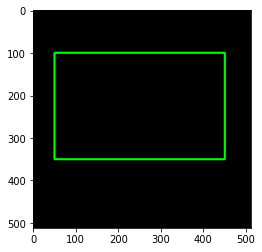

THE IMAGE WAS SAVED


In [3]:
rect = np.zeros([512, 512, 3], dtype=np.uint8)
rec = cv2.rectangle(rect, (50, 100), (450, 350), (0, 255, 0), 3)

plt.imshow(rect)
cv2.imwrite("rect.png", rect)
plt.show()
print("THE IMAGE WAS SAVED")

#### Displaying the image that we have created

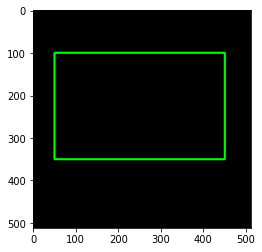

In [4]:

rectImg = cv2.imread('rect.png')
plt.imshow(rectImg)
plt.show()

### 1. Convert the image to grayscale

In [5]:
imgGray = cv2.cvtColor(rectImg, cv2.COLOR_BGR2GRAY)

cv2.imshow("Gray Imag", imgGray)
cv2.waitKey(0)

-1

### 2. Apply the threshold or canny to the image

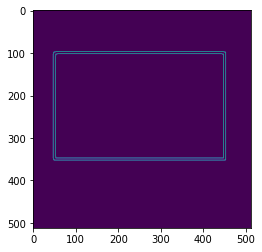

In [7]:
imgBlur = cv2.GaussianBlur(imgGray, (7,7), 1)
imgCanny = cv2.Canny(imgBlur, 50, 50)
plt.imshow(imgCanny)
plt.show()

### 3. Detect Contors on the image

In [10]:
contours, hierarchy = cv2.findContours(imgCanny,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    print(cnt)
print(hierarchy)

[[[ 53  97]]

 [[ 52  98]]

 [[ 49  98]]

 [[ 48  99]]

 [[ 48 102]]

 [[ 47 103]]

 [[ 47 347]]

 [[ 48 348]]

 [[ 48 351]]

 [[ 49 352]]

 [[451 352]]

 [[452 351]]

 [[452  99]]

 [[451  98]]

 [[448  98]]

 [[447  97]]]
[[[-1 -1 -1 -1]]]


## 1. Aspect Ratio
* It is the ratio of width to height of bounding rect of the object, found as

In [22]:
cnt = contours[0]
x, y, w, h = cv2.boundingRect(cnt)
aspectRatio = float(w)/h
aspectRatio

103936


1.5859375

## 2. Extent
* Extent is the ratio of contour area to bounding rectangle area,

In [25]:
contour_area = cv2.contourArea(cnt)
bounding_area = w*h

extent = float(contour_area)/bounding_area
extent

0.9934382697044335

## 3. Solidity
* Solidity is the ratio of contour area to its convex hull area

In [27]:
contour_area = cv2.contourArea(cnt)
hull_area = cv2.convexHull(cnt)

solidity = float(contour_area)/hull_area
solidity

array([[[ 230.99328859, 1064.4742268 ]],

       [[ 228.94456763, 1053.6122449 ]],

       [[ 228.4380531 , 1042.96969697]],

       [[ 228.4380531 ,  294.17094017]],

       [[ 228.94456763,  293.33522727]],

       [[2107.2244898 ,  293.33522727]],

       [[2151.125     ,  294.17094017]],

       [[2196.89361702,  297.56195965]],

       [[2196.89361702, 1002.46601942]],

       [[2151.125     , 1042.96969697]],

       [[2107.2244898 , 1053.6122449 ]],

       [[1948.18867925, 1064.4742268 ]]])

## 4. Equivalent Diameter
* Equivalent Diameter is the diameter of the circle whose area is same as the contour area,

In [28]:
contour_area = cv2.contourArea(cnt)

eqi_diameter = np.sqrt(contour_area/np.pi)
eqi_diameter

181.29194407921474

## 5. Orientation
* Orientation is the angle at which object is directed. Following method also gives the Major Axis and Minor Axis
lengths.

In [29]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
angle

90.22177124023438

## 6. Mask and Pixel Points
* In some cases, we may need all the points which comprises that object. It can be done as follows:

array([[ 97,  53],
       [ 97,  54],
       [ 97,  55],
       ...,
       [352, 449],
       [352, 450],
       [352, 451]], dtype=int64)

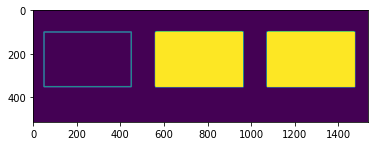

In [36]:
# mask = np.zeros(imgray.shape,np.uint8)
maskImage = np.zeros_like(imgGray, dtype=np.uint8)
finalMask = cv2.drawContours(maskImage,[cnt],0,255,-1)

# We want to display all the images transforamtions

allTransfomations= np.hstack([imgGray,maskImage,  finalMask])
plt.imshow(allTransfomations)

pixelpoints = np.transpose(np.nonzero(finalMask))
pixelpoints

## 7. Maximum Value, Minimum Value and their locations
* We can find these parameters using a mask image.

In [37]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgGray,mask = finalMask)
print(min_val, max_val, min_loc, max_loc)


0.0 150.0 (53, 97) (50, 98)


##### Visualising the locations of the min_value and max_value

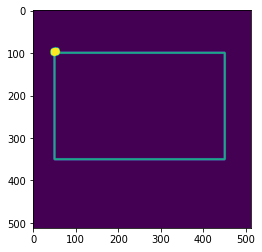

In [50]:

imageVisualisaton = imgGray.copy()
imageVisualisaton = cv2.circle(imageVisualisaton,min_loc, 10, (255,255, 255), -1)
imageVisualisaton = cv2.circle(imageVisualisaton,max_loc, 10, (255,255, 255), -1)
plt.imshow(imageVisualisaton)
plt.show()

## 8. Mean Color or Mean Intensity

* Here, we can find the average color of an object. Or it can be average intensity of the object in grayscale mode. We
again use the same mask to do it.

In [52]:
mean_val = cv2.mean(imgGray,mask = finalMask)
mean_val

(9.365707191731385, 0.0, 0.0, 0.0)

## 9. Extreme Points
* Extreme Points means topmost, bottommost, rightmost and leftmost points of the object.

In [54]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

print(leftmost, rightmost, topmost, bottommost)

(47, 103) (452, 351) (53, 97) (49, 352)


#### Visualising the extreme points
* Visualise the extreem points on the gray image

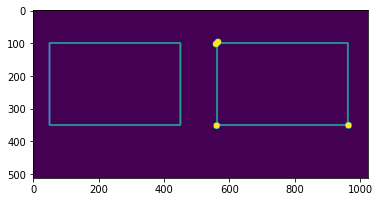

In [63]:
imageVisualisaton = imgGray.copy()
imageVisualisatonOriginal = imgGray.copy()
imageVisualisatonResult = cv2.circle(imageVisualisaton,leftmost, 10, (255,255, 255), -1)
cv2.circle(imageVisualisatonResult,bottommost, 10, (255,255, 255), -1)
cv2.circle(imageVisualisatonResult,rightmost, 10, (255,255, 255), -1)
cv2.circle(imageVisualisatonResult,topmost, 10, (255,255, 255), -1)

imgStack = np.hstack([imageVisualisatonOriginal, imageVisualisatonResult])
plt.imshow(imgStack)
plt.show()

# More functions

## 1. cv2.convexityDefects()

In [64]:
hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)
defects


array([[[  0,   2,   1, 186]],

       [[  3,   5,   4, 186]],

       [[  6,   8,   7, 186]],

       [[ 13,  15,  14, 186]]], dtype=int32)

#### Visualising the deects on our imageGray

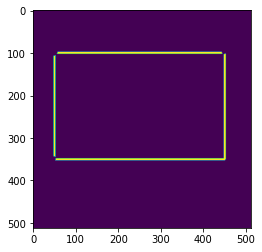

In [65]:
img = imgGray.copy()
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)
    
plt.imshow(img)
plt.show()

## 2. Point Polygon Test
* This function finds the shortest distance between a point in the image and a contour. It returns the distance which is
negative when point is outside the contour, positive when point is inside and zero if point is on the contour.
* In the function, third argument is measureDist. If it is True, it finds the signed distance. If False, it finds
  whether the point is inside or outside or on the contour (it returns +1, -1, 0 respectively).


In [67]:
dist = cv2.pointPolygonTest(cnt,(50,50),False)
dist

-1.0

## 3. Match Shapes

OpenCV comes with a function cv2.matchShapes() which enables us to compare two shapes, or two contours and
returns a metric showing the similarity. The lower the result, the better match it is. It is calculated based on the
hu-moment values. Different measurement methods are explained in the docs.
We will try to match the following images:
* star1.jpg
* star2.jpg
* star3.png
* star4.png
* square.jpg

### 1. Read all the shapes in and display them

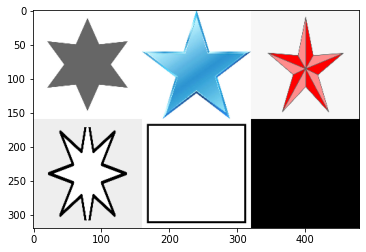

In [6]:
star1 = cv2.imread("star1.jpg")
star2 = cv2.imread("star2.jpg")
star3 = cv2.imread("star3.png")
star4 = cv2.imread("star4.png")
square= cv2.imread("square.jpg")

# we are going to use our imageStack function 
from stackedImages import stackImages

imageStack = stackImages(.2, [[star1, star2, star3],[star4, square,np.zeros_like(square)]])

plt.imshow(imageStack)
plt.show()

### 2. Convert all the shapes to gray scale and display them

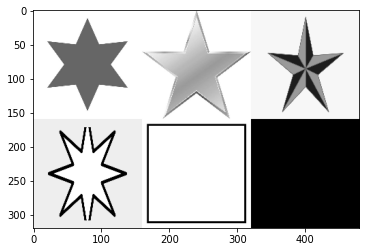

In [77]:
star1Gray = cv2.imread("star1.jpg", 0)
star2Gray = cv2.imread("star2.jpg", 0)
star3Gray = cv2.imread("star3.png", 0)
star4Gray = cv2.imread("star4.png", 0)
squareGray= cv2.imread("square.jpg", 0)
imageStack = stackImages(.2, [[star1Gray, star2Gray, star3Gray],[star4Gray, squareGray,np.zeros_like(square)]])

plt.imshow(imageStack)
plt.show()

### 3. Apply Threshhold to all the shapes in and display them

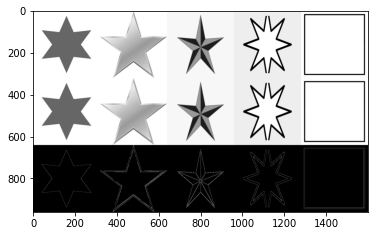

In [82]:
# first shape
star1Blur = cv2.GaussianBlur(star1Gray, (7,7), 1)
star1Canny = cv2.Canny(star1Blur, 50, 50)

# second shape
star2Blur = cv2.GaussianBlur(star2Gray, (7,7), 1)
star2Canny = cv2.Canny(star2Blur, 50, 50)

# 3rd shape
star3Blur = cv2.GaussianBlur(star3Gray, (7,7), 1)
star3Canny = cv2.Canny(star3Blur, 50, 50)

# 4th shape
star4Blur = cv2.GaussianBlur(star4Gray, (7,7), 1)
star4Canny = cv2.Canny(star4Blur, 50, 50)

# firth shape
squareBlur = cv2.GaussianBlur(squareGray, (7,7), 1)
squareCanny = cv2.Canny(squareBlur, 50, 50)

imageStack = stackImages(.4, [[star1Gray, star2Gray, star3Gray, star4Gray, squareGray],
                              [star1Blur, star2Blur, star3Blur, star4Blur, squareBlur],
                              [star1Canny, star2Canny, star3Canny, star4Canny, squareCanny]
                             ])


plt.imshow(imageStack)
plt.show()





### 4. Detects all the contours for each shape 

In [100]:
[star1Canny, star2Canny, star3Canny, star4Canny, squareCanny]

star1Contours, hierarchy = cv2.findContours(star1Canny,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
star2Contours, hierarchy = cv2.findContours(star2Canny,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
star3Contours, hierarchy = cv2.findContours(star3Canny,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
star4Contours, hierarchy = cv2.findContours(star4Canny,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
squareContours, hierarchy = cv2.findContours(squareCanny,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# We are intrestes in the first contor of the image
star1Cnt = star1Contours[0]
star2Cnt = star2Contours[0]
star3Cnt = star3Contours[0]
star4Cnt = star4Contours[0]
squareCnt = squareContours[0]


### 5. Mach Shapes

In [113]:
ret = cv2.matchShapes(squareCnt,squareCnt,1,0.0)
print(ret)
ret = cv2.matchShapes(star1Cnt, star2Cnt, 1, 0.0)
ret

0.0


1.7976931348623157e+308

# Histograms

## 1. Histogram Calculation
* In this example we will be working the our image `avata.png` let's visualise what this image looks like

### Visualising the image

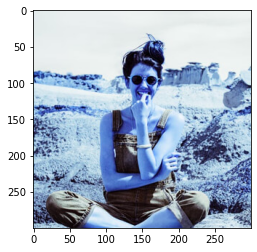

In [4]:
img = cv2.imread('avatar.jpg')
plt.imshow(img)
plt.show()

### a) Calculate the histogram of the image using OpenCV

In [5]:
imageGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([imageGray],[0],None,[256],[0,256])

hist

array([[9.000e+00],
       [5.800e+01],
       [6.400e+01],
       [7.800e+01],
       [1.000e+02],
       [1.170e+02],
       [1.290e+02],
       [1.560e+02],
       [1.620e+02],
       [1.620e+02],
       [2.250e+02],
       [2.000e+02],
       [2.110e+02],
       [2.010e+02],
       [2.020e+02],
       [2.370e+02],
       [2.350e+02],
       [2.150e+02],
       [2.230e+02],
       [2.380e+02],
       [2.440e+02],
       [2.620e+02],
       [2.700e+02],
       [2.770e+02],
       [2.600e+02],
       [2.620e+02],
       [2.610e+02],
       [2.380e+02],
       [2.180e+02],
       [2.190e+02],
       [2.000e+02],
       [1.960e+02],
       [2.030e+02],
       [1.950e+02],
       [1.830e+02],
       [1.890e+02],
       [1.740e+02],
       [1.720e+02],
       [1.550e+02],
       [1.620e+02],
       [1.840e+02],
       [1.390e+02],
       [1.460e+02],
       [1.430e+02],
       [1.440e+02],
       [1.280e+02],
       [1.440e+02],
       [1.350e+02],
       [1.410e+02],
       [1.270e+02],


> hist is a 256x1 array, each value corresponds to number of pixels in that image with its corresponding pixel value.

### a) Calculate the histogram of the image using numpy
* Numpy also provides you a function, `np.histogram()`.

In [7]:
hist,bins = np.histogram(imageGray.ravel(),256,[0,256])
hist

array([   9,   58,   64,   78,  100,  117,  129,  156,  162,  162,  225,
        200,  211,  201,  202,  237,  235,  215,  223,  238,  244,  262,
        270,  277,  260,  262,  261,  238,  218,  219,  200,  196,  203,
        195,  183,  189,  174,  172,  155,  162,  184,  139,  146,  143,
        144,  128,  144,  135,  141,  127,  128,  115,  128,  126,  119,
        143,  152,  123,  127,  118,  151,  128,  145,  103,  137,  139,
        150,  143,  120,  138,  118,  126,  124,  153,  122,  129,  136,
        141,  115,  140,  115,  135,  124,  128,  139,  144,  120,  139,
        142,  122,  146,  143,  137,  131,  116,  144,  145,  140,  141,
        153,  178,  168,  141,  141,  168,  169,  166,  153,  172,  159,
        180,  162,  170,  175,  183,  196,  187,  181,  175,  196,  196,
        184,  212,  216,  210,  193,  220,  215,  221,  272,  231,  251,
        243,  289,  265,  245,  295,  257,  249,  283,  265,  269,  279,
        301,  294,  337,  306,  301,  299,  318,  2

## 2. Plotting Histograms
There are two ways for this:
* use Matplotlib plotting functions
* use OpenCV drawing functions

### 1. Using Matplotlib

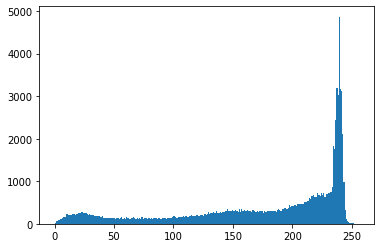

In [8]:
plt.hist(imageGray.ravel(),256,[0,256])
plt.show()

#### a) Plotting the BGR color space of the image

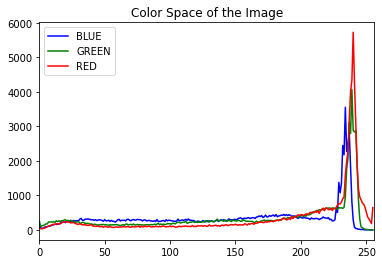

In [2]:
img = cv2.imread("avatar.jpg")
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col, label= ("BLUE" if color[0] == col else "GREEN" if color[1] == col else 'RED'))
    plt.xlim([0,256])
plt.legend()
plt.title("Color Space of the Image")
plt.show()

### 2. Using OpenCV
* Find how to draw a histogram of an image in opencv using opencv Function

# Task
### Drawing a histogram of an image at specific point
* read an image into gray scale
* Create a mask image with the ROI in white and the noise in black color
* Use the bitwise, and pass this mask image to the `cv2.calcHist()` function

> Example:
* Let's say we want to draw a histogram of an images at points [20:250, 20:250] 

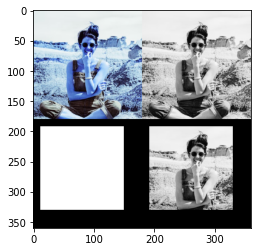

In [28]:
image = cv2.imread("avatar.jpg")
original = image.copy()
image  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
maskImage = np.zeros_like(image, dtype=np.uint8)
# Create a mask image roi
maskImage[20:250, 20:250] = 255
# create a masked image
maskedImage = cv2.bitwise_and(image,image,mask = maskImage)


hist_full = cv2.calcHist([image],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([image],[0],maskImage,[256],[0,256])

allImages = stackImages(.6, [[ original, image], [maskImage,maskedImage]])
plt.imshow(allImages)

plt.show()

### Visualising the mask image

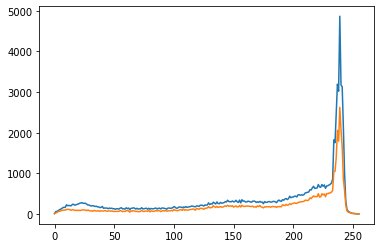

In [29]:
plt.plot(hist_full)
plt.plot(hist_mask)
plt.show()

### Histogram Equalization
* We will learn the concepts of histogram equalization and use it to improve the contrast of our images.
* This normally improves the contrast of the image.
* OpenCV has a function to do this, `cv2.equalizeHist()`. Its input is just grayscale image and output is our histogram equalized image.
> Example:
    * we will read our image in gray scale and then apply the histogramEqualiser to the image and display all the image to visualise the difference
    

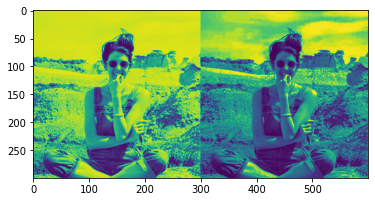

In [31]:
image = cv2.imread("avatar.jpg",0)
equalisedImage = cv2.equalizeHist(image)
allImages = np.hstack([image, equalisedImage])
plt.imshow(allImages)
plt.show()

> Now we are able to see the difference between these two gray images
* the first one is our original Image
* the second one is the equalised Image

### CLAHE (Contrast Limited Adaptive Histogram Equalization)
* The first histogram equalization we just saw, considers the global contrast of the image. In many cases, it is not a good
idea especially when the the histogram equalized images loses the stusture.
* In such cases we use the `CLAHE`
*  In this, image is divided into small blocks called `tiles` **(tileSize is 8x8 by default in OpenCV)**. 
    * Then each of these blocks are histogram equalized as usual. 
    * So in a small area, histogram would confine to a small region **(unless there is noise)**. 
    * If noise is there, it will be amplified.
    * To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit **(by default 40
in OpenCV)**, those pixels are clipped and distributed uniformly to other bins before applying histogram equalization.
    * After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

> Example:


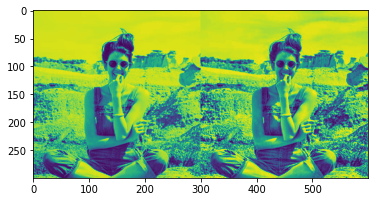

In [33]:
# Apply CLAHE on the imege from the previous example
image = cv2.imread("avatar.jpg",0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equalisedImage = clahe.apply(image)
allImages = np.hstack([image, equalisedImage])
plt.imshow(allImages)
plt.show()

> If we compare this example from the previous one we can see that on this example the images looks closer to each other

## 2D Histograms on Images
* we will learn to find and plot 2D histograms.
* from the previous example we calculated and plotted one-dimensional histogram
* But in two-dimensional histograms, you consider two features. Normally it is used for finding color histograms where two features are:
    * Hue
    * Saturation values of every pixel.
* This can help us in **Histogram Back-Projection** in the future.
* We are still using the same function, `cv2.calcHist()`. For color histograms, we need to convert the
image from `BGR` to `HSV`. **(Remember, for 1D histogram, we converted from BGR to Grayscale)**. 
* For 2D histograms, its parameters will be modified as follows:
    *  **channels** = [0,1] because we need to process both H and S plane.
    * **bins** = [180,256] 180 for H plane and 256 for S plane.
    * **range** = [0,180,0,256] Hue value lies between 0 and 180 & Saturation lies between 0 and 256
### Histogram Calculation

In [42]:
image = cv2.imread('avatar.jpg')
hsvImage = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsvImage], [0, 1], None, [180, 256], [0, 180, 0, 256])
hist

array([[71.,  0.,  0., ...,  0.,  0., 76.],
       [ 0.,  0.,  0., ...,  0.,  0., 11.],
       [ 0.,  0.,  0., ...,  0.,  0., 10.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  4.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  6.]], dtype=float32)

## 2D Histogram in Numpy
* Numpy also provides a specific function for this : 
    * `np.histogram2d()`. **(Remember, for 1D histogram we used `np.histogram()`)**.


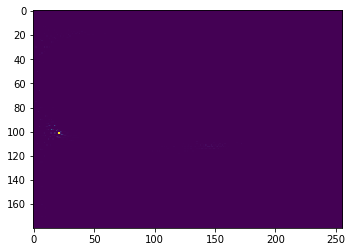

In [43]:
image = cv2.imread('me.jpg')
hsvImage = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsvImage], [0, 1], None, [180, 256], [0, 180, 0, 256])

plt.imshow(hist,interpolation = 'nearest')
plt.show()

## Histogram Backprojection
**What is it actually in simple words?** 
* It is used for image segmentation or finding objects of interest in an image. In simple words, it creates an image of the same size (but single channel) as that of our input image, where each pixel corresponds to the probability of that pixel belonging to our object. In more simpler worlds, the output image will have our object of interest in more white compared to remaining part. Well, that is an intuitive explanation. (I can’t make it more simpler). Histogram Backprojection is used with camshift algorithm etc.
**How do we do it ?** 
* We create a histogram of an image containing our object of interest.
* The object should fill the image as far as possible for better results. 
* And a color histogram is preferred over grayscale histogram, because color of the object is more better way to define the object than its grayscale intensity. 
* We then “back-project” this histogram over our test image where we need to find the object, ie in other words, we calculate the probability of every pixel belonging to the ground and show it. The resulting output on proper thresholding gives us the ground alone

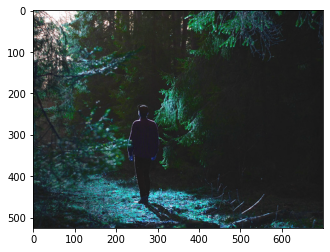

In [41]:
image = cv2.imread('pic07.jpg')

plt.imshow(image)
plt.show()